In [302]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split


In [319]:
df_train = pd.read_csv('Cleaned_train.csv', index_col=["ID"])
df_test = pd.read_csv('Cleaned_test.csv', index_col=["ID"])
test_id = df_test.index
common_cols = list(set(df_train.columns) & set(df_test.columns))
df_train = df_train[common_cols]
df_test = df_test[common_cols]

In [320]:
df_test.columns.tolist()

['Automatic',
 'Alloy wheels',
 'city_cars',
 'Rok_produkcji',
 'Panoramic roof',
 'Data_publikacji_oferty',
 'On-board computer',
 'Central locking',
 'Rear wheels',
 'Xenon lights',
 'Kraj_pochodzenia',
 'Sunroof',
 'Waluta',
 'Active cruise control',
 'Rear side airbags',
 'CD changer',
 'Shift paddles',
 'Auxiliary heating',
 'ASR (traction control)',
 'convertible',
 'Cena',
 'Heated windscreen',
 'Gasoline + CNG',
 'Aftermarket radio',
 'Electrochromic side mirrors',
 'Heated side mirrors',
 'Front parking sensors',
 'Hybrid',
 'Velor upholstery',
 'Miesiac_publikacji_oferty',
 'minivan',
 'AUX socket',
 '4x4 (attached manually)',
 'Rear parking sensors',
 'Hook',
 'Immobilizer',
 'coupe',
 'Used',
 'Rok_startu_produkcji',
 'Typ_silnika',
 'Przebieg_km',
 'Rear view camera',
 'Front wheels',
 'Heated rear seats',
 'compact',
 'Gasoline + LPG',
 'Electric rear windows',
 'Electrically adjustable seats',
 'Fog lights',
 'Twilight sensor',
 'Lane assistant',
 'ABS',
 'Kierownica_str

In [321]:
dtype_dict = {
    # Category columns
    "Naped": "category",
    "Skrzynia_biegow": "category",
    "Typ_nadwozia": "category",
    "Kolor": "category",
    "Kraj_pochodzenia": "category",

    # String columns
    "Marka_pojazdu": "category",
    "Model_pojazdu": "string",
    # "Wersja_pojazdu": "string",
    # "Nazwa_generacji": "string",
    "Typ_silnika": "category",

    # Float columns
    "Rok_produkcji": "float64",
    "Przebieg_km": "float64",
    "Moc_KM": "float64",
    "Pojemnosc_cm3": "float64",
    "Emisja_CO2": "float64",
    "Liczba_drzwi": "float64",
    "Rok_startu_produkcji": "float64",
    "Rok_konca_produkcji": "float64",
    'Wspolczynnik_Rok_produkcji': "float64",
    'Wspolczynnik_Przebieg_km': "float64",
    'Wspolczynnik_Moc_KM': "float64",
    'Wspolczynnik_Pojemnosc_cm3': "float64",
    'Wspolczynnik_Liczba_drzwi': "float64",
    'Wspolczynnik_Automatic': "float64",
    'Wspolczynnik_Manual': "float64",
    'Wspolczynnik_SUV': "float64",
    'Wspolczynnik_sedan': "float64",
    'Wspolczynnik_station_wagon': "float64",

    # Integer columns
    "Rok_publikacji_oferty": "float",
    "Miesiac_publikacji_oferty": "float",

    # Boolean columns
    "Xenon lights": "float",
    "Factory radio": "float",
    "Velor upholstery": "float",
    "DVD player": "float",
    "Start-Stop system": "float",
    "Electrically adjustable seats": "float",
    "Fog lights": "float",
    "Shift paddles": "float",
    "Passengers airbag": "float",
    "Daytime running lights": "float",
    "Power steering": "float",
    "Four-zone air conditioning": "float",
    "Sunroof": "float",
    "GPS navigation": "float",
    "Manual air conditioning": "float",
    "Heated side mirrors": "float",
    "Parking assistant": "float",
    "ESP(stabilization of the track)": "float",
    "Immobilizer": "float",
    "Leather upholstery": "float",
    "Lane assistant": "float",
    "Drivers airbag": "float",
    "USB socket": "float",
    "Electric front windows": "float",
    "Blind spot sensor": "float",
    "SD socket": "float",
    "Speed limiter": "float",
    "Electrochromic side mirrors": "float",
    "LED lights": "float",
    "AUX socket": "float",
    "Auxiliary heating": "float",
    "Heated front seats": "float",
    "Rain sensor": "float",
    "Rear parking sensors": "float",
    "Twilight sensor": "float",
    "Front side airbags": "float",
    "Automatic air conditioning": "float",
    "Roof rails": "float",
    "Central locking": "float",
    "ABS": "float",
    "CD": "float",
    "Bluetooth": "float",
    "Dual zone air conditioning": "float",
    "Alloy wheels": "float",
    "Cruise control": "float",
    "Airbag protecting the knees": "float",
    "TV tuner": "float",
    "Rear side airbags": "float",
    "Multifunction steering wheel": "float",
    "Air curtains": "float",
    "On-board computer": "float",
    "Active cruise control": "float",
    "CD changer": "float",
    "Electrochromic rear view mirror": "float",
    "Tfloated windows": "float",
    "Adjustable suspension": "float",
    "Rear view camera": "float",
    "MP3": "float",
    "Heated rear seats": "float",
    "Electric rear windows": "float",
    "Alarm": "float",
    "Hook": "float",
    "Heated windscreen": "float",
    "Isofix": "float",
    "Front parking sensors": "float",
    "Panoramic roof": "float",
    "Aftermarket radio": "float",
    "HUD(head-up display)": "float",
    "Electrically adjustable mirrors": "float",
    "ASR (traction control)": "float",
    'Marka_pojazdu_encoded': "float",
     'Marka_Audi': "float",
     'Marka_BMW': "float",
     'Marka_Citroën': "float",
     'Marka_Fiat': "float",
     'Marka_Ford': "float",
     'Marka_Honda': "float",
     'Marka_Hyundai': "float",
     'Marka_Jeep': "float",
     'Marka_Mazda': "float",
     'Marka_Mercedes-Benz': "float",
     'Marka_Mitsubishi': "float",
     'Marka_Nissan': "float",
     'Marka_Opel': "float",
     'Marka_Peugeot': "float",
     'Marka_Renault': "float",
     'Marka_Seat': "float",
     'Marka_Suzuki': "float",
     'Marka_Toyota': "float",
     'Marka_Volkswagen': "float",
     'Marka_Volvo': "float",
     'Marka_Škoda': "float",

    # Object columns (to be handled separately)
    "Pierwszy_wlasciciel": "float",  # Leave as object or map to category if needed
    "Cena": "float",  # Leave as object or convert to float after cleaning
    "Rok_pierwszej_rejestracji": "float",  # Leave as object or convert to datetime
    "Miesiac_pierwszej_rejestracji": "float",  # Leave as object or convert to datetime
    "Wojewodztwo": "category",  # Leave as object or map to category
    # "Miejscowosc": "object",  # Leave as object or map to category
}
ls = list(set(list(dtype_dict.keys())) & set(common_cols))
new_dtype_dict = {}
for element in ls:
    new_dtype_dict[element] = dtype_dict[element]

df_train = df_train[ls].astype(new_dtype_dict)
df_test = df_test[ls].astype(new_dtype_dict)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135397 entries, 1 to 135397
Data columns (total 83 columns):
 #   Column                           Non-Null Count   Dtype   
---  ------                           --------------   -----   
 0   Alloy wheels                     132144 non-null  float64 
 1   Rok_produkcji                    125572 non-null  float64 
 2   Panoramic roof                   132144 non-null  float64 
 3   On-board computer                132144 non-null  float64 
 4   Central locking                  132144 non-null  float64 
 5   Xenon lights                     132144 non-null  float64 
 6   Kraj_pochodzenia                 74977 non-null   category
 7   Sunroof                          132144 non-null  float64 
 8   Active cruise control            132144 non-null  float64 
 9   Rear side airbags                132144 non-null  float64 
 10  CD changer                       132144 non-null  float64 
 11  Shift paddles                    132144 non-null  float64

In [322]:
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

class CategoricalImputer:
    def __init__(self):
        self.imputers = {}
        self.mode_values = {}

    def fit(self, X_train):
        """Zapamiętuje modę dla każdej kolumny kategorycznej/tekstowej"""
        self.mode_values = {}
        for col in X_train.select_dtypes(include=['object', 'category']).columns:
            mode_val = X_train.loc[X_train[col].notnull() ,col].mode()[0]
            self.mode_values[col] = mode_val
            self.imputers[col] = SimpleImputer(strategy='constant', fill_value=mode_val)
            self.imputers[col].fit(X_train[[col]])
        return self

    def transform(self, X):
        """Wypełnia braki zapamiętanymi wartościami"""
        X_transformed = X.copy()
        for col, imputer in self.imputers.items():
            if col in X.columns:
                X_transformed[col] = imputer.transform(X[[col]]).flatten()
        return X_transformed


# 1. Inicjalizacja i trening tylko na danych treningowych
imputer = CategoricalImputer().fit(df_train)

# 2. Transformacja obu zbiorów
df_train = imputer.transform(df_train)
df_test = imputer.transform(df_test)

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135397 entries, 1 to 135397
Data columns (total 83 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Alloy wheels                     132144 non-null  float64
 1   Rok_produkcji                    125572 non-null  float64
 2   Panoramic roof                   132144 non-null  float64
 3   On-board computer                132144 non-null  float64
 4   Central locking                  132144 non-null  float64
 5   Xenon lights                     132144 non-null  float64
 6   Kraj_pochodzenia                 135397 non-null  object 
 7   Sunroof                          132144 non-null  float64
 8   Active cruise control            132144 non-null  float64
 9   Rear side airbags                132144 non-null  float64
 10  CD changer                       132144 non-null  float64
 11  Shift paddles                    132144 non-null  float64
 12  Auxilia

In [323]:
non_number_columns = df_train.select_dtypes(exclude=['float', "int"]).columns
df_train.select_dtypes(exclude=['float', "int"])

,Kraj_pochodzenia,Typ_silnika,Wojewodztwo,Marka_pojazdu,Model_pojazdu
ID,,,,,
1,Poland,2.0 TDI,ŁÓDZKIE,Renault,Grand Espace
2,Poland,1.6 16V,ŚLĄSKIE,Renault,Megane
3,Denmark,1.6 CDTI,ŚLĄSKIE,Opel,Zafira
4,Poland,1.6 TDCi,ŚLĄSKIE,Ford,Focus
5,Poland,1.8,ŚLĄSKIE,Toyota,Avensis
...,...,...,...,...,...
135393,Poland,2.0 TDI,DOLNOŚLĄSKIE,Opel,Astra
135394,Poland,2.0 TDI,MAZOWIECKIE,Mercedes-Benz,Vito
135395,Poland,2.0 TDI,MAZOWIECKIE,Volkswagen,Zafira


In [324]:
from category_encoders import TargetEncoder

encoders_dict = {}
refactored_columns = []
for column in non_number_columns:
    # Inicjalizacja kodera
    encoders_dict[column] = TargetEncoder()

    # Kodowanie danych treningowych
    df_train[f"{column}_refactored"] = encoders_dict[column].fit_transform(
        df_train[column],
        df_train["Cena"]  # Target
    ).astype(float)

    # Kodowanie danych testowych
    df_test[f"{column}_refactored"] = encoders_dict[column].transform(
        df_test[column]
    ).astype(float)

    refactored_columns.append(f"{column}_refactored")




# Sprawdź typy danych
print(df_train[refactored_columns])


        Kraj_pochodzenia_refactored  Typ_silnika_refactored  \
ID                                                            
1                      73134.148951            74895.300680   
2                      73134.148951            16233.292419   
3                      34549.597590            42221.292804   
4                      73134.148951            19234.850799   
5                      73134.148951            18626.524546   
...                             ...                     ...   
135393                 73134.148951            74895.300680   
135394                 73134.148951            74895.300680   
135395                 73134.148951            74895.300680   
135396                 34027.312682            52495.768878   
135397                 73134.148951            74895.300680   

        Wojewodztwo_refactored  Marka_pojazdu_refactored  \
ID                                                         
1                 80520.940279              35343.097529   


In [325]:
df_train.drop(columns=non_number_columns, inplace=True)
df_test.drop(columns=non_number_columns, inplace=True)

In [326]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135397 entries, 1 to 135397
Data columns (total 83 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Alloy wheels                     132144 non-null  float64
 1   Rok_produkcji                    125572 non-null  float64
 2   Panoramic roof                   132144 non-null  float64
 3   On-board computer                132144 non-null  float64
 4   Central locking                  132144 non-null  float64
 5   Xenon lights                     132144 non-null  float64
 6   Sunroof                          132144 non-null  float64
 7   Active cruise control            132144 non-null  float64
 8   Rear side airbags                132144 non-null  float64
 9   CD changer                       132144 non-null  float64
 10  Shift paddles                    132144 non-null  float64
 11  Auxiliary heating                132144 non-null  float64
 12  ASR (tr

In [327]:
from sklearn.impute import SimpleImputer

# Krok 1: Imputacja na danych treningowych
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(df_train.drop(columns=['Cena']))
y_train = df_train['Cena'].values

# Krok 2: Transformacja danych testowych (BEZ fit_transform!)
X_test_imputed = imputer.transform(df_test.drop(columns=['Cena']))
y_test = df_test['Cena'].values

In [328]:
# Downcasting data types
def reduce_dtypes(df: pd.DataFrame) -> pd.DataFrame:
    for col in df.columns:
        col_type = df[col].dtype
        if pd.api.types.is_numeric_dtype(col_type):
            if pd.api.types.is_integer_dtype(col_type):
                df[col] = pd.to_numeric(df[col], downcast='integer')
            elif pd.api.types.is_float_dtype(col_type):
                df[col] = pd.to_numeric(df[col], downcast='float')
    return df

In [329]:
df_train = reduce_dtypes(df_train)
df_test = reduce_dtypes(df_test)

In [330]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135397 entries, 1 to 135397
Data columns (total 83 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Alloy wheels                     132144 non-null  float32
 1   Rok_produkcji                    125572 non-null  float32
 2   Panoramic roof                   132144 non-null  float32
 3   On-board computer                132144 non-null  float32
 4   Central locking                  132144 non-null  float32
 5   Xenon lights                     132144 non-null  float32
 6   Sunroof                          132144 non-null  float32
 7   Active cruise control            132144 non-null  float32
 8   Rear side airbags                132144 non-null  float32
 9   CD changer                       132144 non-null  float32
 10  Shift paddles                    132144 non-null  float32
 11  Auxiliary heating                132144 non-null  float32
 12  ASR (tr

## Szukanie najlepszych parametrów

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import numpy as np
import cupy as cp

X_train = df_train.loc[:, df_train.columns != "Cena"].to_numpy()
y_train = df_train["Cena"].to_numpy()
X_test = df_test.loc[:, df_test.columns != "Cena"].to_numpy()

# Parametry do tuningu
param_grid_optimized = {
    "n_estimators": [100, 150, 200, 250, 300, 350, 400, 450, 500, 550,  600, 650, 700, 750, 800, 850, 900, 950],       # Zwiększona liczba drzew dla lepszej generalizacji
    "max_depth": [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],                # Płytsze drzewa (wiele cech binarnych)
    "learning_rate": [0.01, 0.05, 0.07, 0.1],     # Niższe learning rate dla stabilności
    "subsample": [0.6, 0.7, 0.8, 0.9, 1.0],           # Losowa próbka danych dla każdego drzewa
    "colsample_bytree": [0.6, 0.7, 0.8],    # 60-80% cech na drzewo (wiele zmiennych)
    "gamma": [0, 0.1, 0.2, 0.3, 0.4, 0.5],                 # Kontrola podziałów węzłów
    "reg_alpha": [0, 0.02, 0.1, 1, 10],           # L1 - dobre dla danych rzadkich
    "reg_lambda": [0, 0.1, 1, 10],          # L2 - stabilizacja wag
    "min_child_weight": [1, 5, 10]          # Dodatkowa kontrola przeuczenia
}
param_grid_restricted = {
    # 21 min
    "n_estimators": [100, 150, 200, 250, 300, 350, 400, 450, 500, 550,  600],  # Zamiast [50, 100, 200, 300]
    "max_depth": [17],  # Zamiast [3, 5, 7, 9]
    "learning_rate": [0.04, 0.05],  # Zamiast [0.01, 0.05, 0.1, 0.2]
    "subsample": [0,9, 1],  # Zamiast [0.6, 0.8, 1.0]
    "colsample_bytree": [0.6],  # Zamiast [0.6, 0.8, 1.0]
    "gamma": [0.3, 0.04],  # Zamiast [0, 0.1, 0.2]
    "reg_alpha": [0.8, 1],  # Zamiast [0, 0.1, 1]
    "reg_lambda": [0.1, 0.06],  # Zamiast [0, 0.1, 1]
}

# Parametry specyficzne dla GPU
params = {
    "device" : "cuda",
    "tree_method" : "hist",
    "objective": "reg:squarederror",  # Zadanie regresji
    "eval_metric": "rmse",  # Metryka RMSE
    # "gpu_id": 0,  # Użyj GPU o indeksie 0
    # "predictor": "gpu_predictor",  # Użyj GPU do predykcji
}

# Inicjalizacja modelu XGBRegressor z parametrami GPU
xgb = XGBRegressor(**params, enable_categorical=True, random_state=42)

# Konfiguracja Grid Search
# grid_search = GridSearchCV(
#     estimator=xgb,
#     param_grid=param_grid_restricted,
#     scoring="neg_mean_squared_error",  # Metryka do optymalizacji (RMSE)
#     cv=5,  # 5-krotna walidacja krzyżowa
#     n_jobs=-1,  # Użyj wszystkich dostępnych rdzeni CPU
#     verbose=2,  # Wyświetl postęp
# )

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid_optimized,
    n_iter=100,  # Przetestuj tylko 50 losowych kombinacji
    scoring="neg_mean_squared_error",
    cv=3,
    n_jobs=1,
    verbose=3,
    random_state=42,
    error_score='raise'
)

# Trenowanie modelu z Grid Search
# grid_search.fit(X_train, y_train)
random_search.fit(X_train, y_train)

# Najlepsze parametry i wynik
print("Najlepsze parametry:", random_search.best_params_)
print("Najlepszy wynik (Negative MSE):", random_search.best_score_)
print("Najlepszy wynik (RMSE):", np.sqrt(-random_search.best_score_))


# Ocena modelu na zbiorze testowym
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)



Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=11, min_child_weight=5, n_estimators=450, reg_alpha=0.1, reg_lambda=0, subsample=0.9;, score=-1619396166.092 total time=  10.3s
[CV 2/3] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=11, min_child_weight=5, n_estimators=450, reg_alpha=0.1, reg_lambda=0, subsample=0.9;, score=-608591112.816 total time=   9.1s
[CV 3/3] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=11, min_child_weight=5, n_estimators=450, reg_alpha=0.1, reg_lambda=0, subsample=0.9;, score=-1083371811.600 total time=   9.5s
[CV 1/3] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.05, max_depth=12, min_child_weight=10, n_estimators=400, reg_alpha=10, reg_lambda=0.1, subsample=1.0;, score=-1604450807.133 total time=   5.6s
[CV 2/3] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.05, max_depth=12, min_child_weight=10, n_estimators=400, r

In [332]:
import pandas as pd
import os

# Konwertuj wyniki do DataFrame
results_df = pd.DataFrame(random_search.cv_results_)

# Rozwiń słownik parametrów do osobnych kolumn
params_df = pd.json_normalize(results_df["params"])
results_df = pd.concat([results_df.drop(columns="params"), params_df], axis=1)

# Wybierz kluczowe kolumny
selected_columns = [
    "mean_test_score", "std_test_score",
    "split0_test_score", "split1_test_score", "split2_test_score",  # Wyniki dla każdego folda (cv=3)
    "mean_fit_time", "std_fit_time",
    "n_estimators", "max_depth", "learning_rate",  # Hiperparametry
    "subsample", "colsample_bytree", "gamma",
    "reg_alpha", "reg_lambda", "min_child_weight"
]


filename = "wyniki_tuningu.csv"

# Konwertuj aktualne wyniki do DataFrame
current_results = pd.DataFrame(random_search.cv_results_)
params_expanded = pd.json_normalize(current_results["params"])
current_results = pd.concat([current_results.drop(columns="params"), params_expanded], axis=1)

# Jeśli plik istnieje, wczytaj stare wyniki i połącz z nowymi
if os.path.isfile(filename):
    existing_results = pd.read_csv(filename)
    combined_results = pd.concat([existing_results, current_results], ignore_index=True)
    combined_results.to_csv(filename, index=False)
else:
    current_results.to_csv(filename, index=False)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

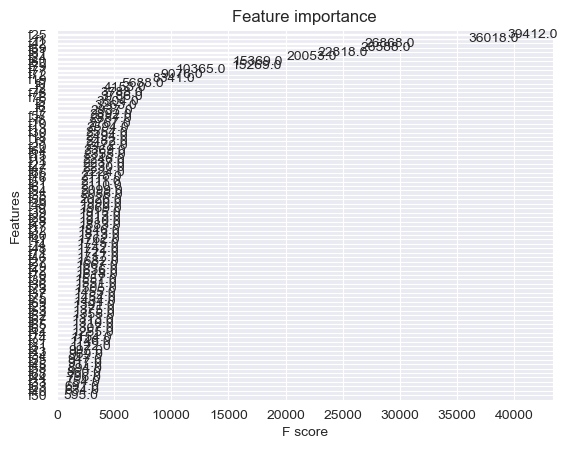

In [250]:
from xgboost import plot_importance
plot_importance(random_search.best_estimator_)

In [208]:
y_pred = best_model.predict(df_test.loc[:, X_train.columns])

In [182]:
param_grid_restricted = {
    'subsample': [1],
    'reg_lambda': [0.06],
    'reg_alpha': [1],
    'n_estimators': [195, 196],
    'max_depth': [11],
    'learning_rate': [0.05],
    'gamma': [0.3],
    'colsample_bytree':[0.6]
}

# Parametry specyficzne dla GPU
params = {
    # "device" : "cuda",
    "tree_method" : "gpu_hist",
    "objective": "reg:squarederror",  # Zadanie regresji
    "eval_metric": "rmse",  # Metryka RMSE
    "gpu_id": 0,  # Użyj GPU o indeksie 0
    "predictor": "gpu_predictor",  # Użyj GPU do predykcji
}

# Inicjalizacja modelu XGBRegressor z parametrami GPU
xgb = XGBRegressor(**params, enable_categorical=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid_restricted,
    n_iter=50,  # Przetestuj tylko 50 losowych kombinacji
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=-2,
    verbose=3,
    random_state=42
)

# Trenowanie modelu z Grid Search
# grid_search.fit(X_train, y_train)
random_search.fit(df_train.loc[:, df_train.columns != "Cena"],
        df_train["Cena"])

# Najlepsze parametry i wynik
print("Najlepsze parametry:", random_search.best_params_)
print("Najlepszy wynik (Negative MSE):", random_search.best_score_)

# Ocena modelu na zbiorze testowym
best_model = random_search.best_estimator_
y_pred = best_model.predict(df_test[:, (df_test.columns != "Model_pojazdu")])

C:\Users\vipcy\anaconda3\envs\car-prices-prediction\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=50. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 2 candidates, totalling 10 fits


C:\Users\vipcy\anaconda3\envs\car-prices-prediction\lib\site-packages\xgboost\core.py:158: UserWarning: [20:16:29] WARNING: D:\bld\xgboost-split_1742444215012\work\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\vipcy\anaconda3\envs\car-prices-prediction\lib\site-packages\xgboost\core.py:158: UserWarning: [20:16:29] WARNING: D:\bld\xgboost-split_1742444215012\work\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)


Najlepsze parametry: {'subsample': 1, 'reg_lambda': 0.06, 'reg_alpha': 1, 'n_estimators': 196, 'max_depth': 11, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 0.6}
Najlepszy wynik (Negative MSE): -1322341477.6955178


ValueError: feature_names mismatch: ['Sunroof', 'Electrochromic side mirrors', 'Shift paddles', 'Heated front seats', 'CD', 'Rain sensor', 'Parking assistant', 'Alloy wheels', 'Pierwszy_wlasciciel', 'Electrically adjustable seats', 'Heated side mirrors', 'TV tuner', 'Four-zone air conditioning', 'ASR (traction control)', 'Rok_publikacji_oferty', 'HUD(head-up display)', 'CD changer', 'Power steering', 'Wojewodztwo', 'Immobilizer', 'Fog lights', 'ESP(stabilization of the track)', 'On-board computer', 'Front side airbags', 'Heated rear seats', 'Rok_startu_produkcji', 'Bluetooth', 'Isofix', 'Leather upholstery', 'Rear side airbags', 'ABS', 'Passengers airbag', 'SD socket', 'LED lights', 'Kraj_pochodzenia', 'Central locking', 'Rok_pierwszej_rejestracji', 'Electrically adjustable mirrors', 'MP3', 'Air curtains', 'Miesiac_publikacji_oferty', 'Kolor', 'Airbag protecting the knees', 'Daytime running lights', 'Pojemnosc_cm3', 'Typ_silnika', 'Manual air conditioning', 'Liczba_drzwi', 'Panoramic roof', 'Electrochromic rear view mirror', 'Twilight sensor', 'Emisja_CO2', 'GPS navigation', 'Heated windscreen', 'Blind spot sensor', 'Przebieg_km', 'Speed limiter', 'Multifunction steering wheel', 'Rok_konca_produkcji', 'Hook', 'Dual zone air conditioning', 'Front parking sensors', 'AUX socket', 'Active cruise control', 'Drivers airbag', 'Adjustable suspension', 'Start-Stop system', 'Rear view camera', 'DVD player', 'Rear parking sensors', 'Miesiac_pierwszej_rejestracji', 'Cruise control', 'Moc_KM', 'Alarm', 'USB socket', 'Factory radio', 'Xenon lights', 'Lane assistant', 'Electric rear windows', 'Aftermarket radio', 'Auxiliary heating', 'Marka_pojazdu', 'Rok_produkcji', 'Automatic air conditioning', 'Tinted windows', 'Velor upholstery', 'Electric front windows', 'Roof rails', 'Marka_Model'] ['Sunroof', 'Electrochromic side mirrors', 'Shift paddles', 'Heated front seats', 'CD', 'Rain sensor', 'Parking assistant', 'Alloy wheels', 'Pierwszy_wlasciciel', 'Electrically adjustable seats', 'Heated side mirrors', 'TV tuner', 'Four-zone air conditioning', 'ASR (traction control)', 'Rok_publikacji_oferty', 'HUD(head-up display)', 'CD changer', 'Power steering', 'Wojewodztwo', 'Immobilizer', 'Fog lights', 'ESP(stabilization of the track)', 'On-board computer', 'Front side airbags', 'Heated rear seats', 'Rok_startu_produkcji', 'Bluetooth', 'Isofix', 'Leather upholstery', 'Rear side airbags', 'ABS', 'Passengers airbag', 'SD socket', 'LED lights', 'Kraj_pochodzenia', 'Central locking', 'Rok_pierwszej_rejestracji', 'Electrically adjustable mirrors', 'MP3', 'Air curtains', 'Miesiac_publikacji_oferty', 'Kolor', 'Airbag protecting the knees', 'Daytime running lights', 'Pojemnosc_cm3', 'Typ_silnika', 'Manual air conditioning', 'Liczba_drzwi', 'Panoramic roof', 'Electrochromic rear view mirror', 'Twilight sensor', 'Emisja_CO2', 'GPS navigation', 'Heated windscreen', 'Blind spot sensor', 'Przebieg_km', 'Speed limiter', 'Multifunction steering wheel', 'Rok_konca_produkcji', 'Hook', 'Dual zone air conditioning', 'Front parking sensors', 'AUX socket', 'Active cruise control', 'Drivers airbag', 'Adjustable suspension', 'Start-Stop system', 'Rear view camera', 'DVD player', 'Rear parking sensors', 'Miesiac_pierwszej_rejestracji', 'Cruise control', 'Moc_KM', 'Cena', 'Alarm', 'USB socket', 'Factory radio', 'Xenon lights', 'Lane assistant', 'Electric rear windows', 'Aftermarket radio', 'Auxiliary heating', 'Marka_pojazdu', 'Rok_produkcji', 'Automatic air conditioning', 'Tinted windows', 'Velor upholstery', 'Electric front windows', 'Roof rails', 'Marka_Model']
training data did not have the following fields: Cena

In [211]:
print(df_test.shape)
print(y_pred.shape)

anwser_df = pd.DataFrame({"ID": df_test.index,"Cena": y_pred})
anwser_df.to_csv("Anwser.csv", index=False)

(72907, 92)
(72907,)


In [73]:
# Parametry specyficzne dla GPU
param_grid_restricted = {
    # 21 min
    "n_estimators": [200],  # Zamiast [50, 100, 200, 300]
    "max_depth": [7],  # Zamiast [3, 5, 7, 9]
    "learning_rate": [0.05],  # Zamiast [0.01, 0.05, 0.1, 0.2]
    "subsample": [1],  # Zamiast [0.6, 0.8, 1.0]
    "colsample_bytree": [0.8],  # Zamiast [0.6, 0.8, 1.0]
    "gamma": [0],  # Zamiast [0, 0.1, 0.2]
    "reg_alpha": [0.1],  # Zamiast [0, 0.1, 1]
    "reg_lambda": [0.1],  # Zamiast [0, 0.1, 1]
}
params = {
    "tree_method": "gpu_hist",  # Użyj GPU do budowy drzew
    "objective": "reg:squarederror",  # Zadanie regresji
    "eval_metric": "rmse",  # Metryka RMSE
    "gpu_id": 0,  # Użyj GPU o indeksie 0
    "predictor": "gpu_predictor",  # Użyj GPU do predykcji
}

# Inicjalizacja modelu XGBRegressor z parametrami GPU
xgb = XGBRegressor(**params, enable_categorical=True, random_state=42)

# Konfiguracja Grid Search
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_restricted,
    scoring="neg_mean_squared_error",  # Metryka do optymalizacji (RMSE)
    cv=5,  # 5-krotna walidacja krzyżowa
    n_jobs=-1,  # Użyj wszystkich dostępnych rdzeni CPU
    verbose=2,  # Wyświetl postęp
)

# random_search = RandomizedSearchCV(
#     estimator=xgb,
#     param_distributions=param_grid,
#     n_iter=50,  # Przetestuj tylko 50 losowych kombinacji
#     scoring="neg_mean_squared_error",
#     cv=5,
#     n_jobs=-1,
#     verbose=2,
#     random_state=42,
# )

# Trenowanie modelu z Grid Search
grid_search.fit(X_train, y_train)

# Najlepsze parametry i wynik
print("Najlepsze parametry:", grid_search.best_params_)
print("Najlepszy wynik (Negative MSE):", grid_search.best_score_)

# Ocena modelu na zbiorze testowym
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE na zbiorze testowym: {rmse}")
print(f"R² na zbiorze testowym: {r2}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\vipcy\anaconda3\envs\car-prices-prediction\lib\site-packages\xgboost\core.py:158: UserWarning: [10:57:44] WARNING: D:\bld\xgboost-split_1742444215012\work\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\vipcy\anaconda3\envs\car-prices-prediction\lib\site-packages\xgboost\core.py:158: UserWarning: [10:57:44] WARNING: D:\bld\xgboost-split_1742444215012\work\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)


Najlepsze parametry: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 1}
Najlepszy wynik (Negative MSE): -1444583433.5396085
RMSE na zbiorze testowym: 38406.08798380288
R² na zbiorze testowym: 0.7980510874610559


C:\Users\vipcy\anaconda3\envs\car-prices-prediction\lib\site-packages\xgboost\core.py:158: UserWarning: [10:57:45] WARNING: D:\bld\xgboost-split_1742444215012\work\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


In [174]:
final_anwser = best_model.predict(df_test)

IndexError: Boolean index has wrong length: 89 instead of 27080

In [129]:
anwser_df = pd.DataFrame()
anwser_df.loc[:, "ID"] = X_test.index
anwser_df.loc[:, "Cena"] = final_anwser

In [130]:
anwser_df

,ID,Cena
0,22440,38665.882812
1,4159,20987.648438
2,80228,3643.710938
3,89706,7591.453125
4,74416,9124.679688
...,...,...
27075,124795,19188.574219
27076,64019,28267.101562
27077,107470,44034.601562
27078,47227,20445.632812


In [26]:
df_train["Marka_pojazdu"].unique()

['Renault', 'Opel', 'Ford', 'Toyota', 'BMW', ..., 'Autobianchi', 'Nysa', 'Vanderhall', 'Zaporożec', 'Saturn']
Length: 103
Categories (102, object): ['Abarth', 'Acura', 'Aixam', 'Alfa Romeo', ..., 'Zaporożec', 'Zastava', 'Škoda', 'Żuk']

In [ ]:
### Bayesian Optimization

In [ ]:
import optuna
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 0.5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10.0, log=True),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        # Parametry specyficzne dla GPU 
        'tree_method': 'gpu_hist',  # lub 'hist' jeśli GPU nie jest dostępne
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
    }
    model = XGBRegressor(**params, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    return rmse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print("Najlepsze parametry:", study.best_params)
print("Najlepszy RMSE:", study.best_value)

In [ ]:

final_params = study.best_params.copy()  # Pobieramy najlepsze parametry z optymalizacji
final_params.update({
    "tree_method": "gpu_hist",         # Jeśli GPU
    "objective": "reg:squarederror",    # Zadanie regresji
    "eval_metric": "rmse",              
    "random_state": 42
})

final_model = XGBRegressor(**final_params)
final_model.fit(X_train, y_train)

y_pred_final = final_model.predict(X_test)
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))
print("Final RMSE on test set:", final_rmse)

#import joblib
#joblib.dump(final_model, "final_xgb_model.pkl")